# 다빈도 명사추출 시각화

# 사용 모듈

- KoNLPy
- matplotlib
- PyTagCloud
- WordCloud

# Pytagcloud 설치 순서

- pip install pygame
- pip install pytagcloud
- pip install simplejson

In [ ]:
from collections import Counter # 단어들을 집계하기 위해서 사용
from konlpy.tag import Okt # 형태소 분석기
import pytagcloud #pygame 패키지에 의존적, pygame 설치 요구

In [ ]:
f=open("data/대한민국헌법.txt",encoding='utf-8')
data=f.read()
print(data)

In [ ]:
npl=Okt()  # 형태소 분석기 Okt 생성,Kkma, Mecab-kr, HanNum 등
nouns=npl.nouns(data) # 형태소 분석기로 단어 추출
print(nouns)

In [ ]:
count=Counter(nouns) # 단어 집계 
print(count)

In [ ]:
tag2=count.most_common(20)  # 상위 20개만 추출
taglist=pytagcloud.make_tags(tag2,maxsize=80)  # tag2데이터로 태그 생성
print(taglist)
f.close()

# WordCloud 그리기-pytagcloud

# pytagcloud.create_tag_image() 메서드

- 워드클라우드를 이미지로 출력
- 매개 변수
    - 태그목록
    - 저장될 파일명
    - size : 캔버스 사이즈. 다음과 같이 명시합니다. size=(640,480)
    - fontname : 글꼴 종류. 기본적으로 지원하는 글꼴의 종류
        - Nobile, Old Standard TT, Cantarell, Reenie Beanie, Cuprum, Molengo, Neucha, Philosopher, Yanone Kaffeesatz, Cardo, Neuton, Inconsolata, Crimson Text, Josefin Sans, Droid Sans, Lobster, IM Fell DW Pica, Vollkorn, Tangerine, Coustard, PT Sans Regular

    - rectangular : 워드클라우드를 사각형박스 형태로 할 건지, 원형으로 출력할 건지 명!

# create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='Nobile', rectangular=False)

In [ ]:
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='Nobile', rectangular=False)

이미지를 열어보면 한글이 출력되지 않음

# 한글 글꼴 설정
- C:/anaconda3/Lib/site-packages/pytagcloud/fonts/fonts.json 열어서 다음 내용을 추가
- C:/anaconda3/Lib/site-packages/pytagcloud/fonts에 NanumBarunGothic.ttf 파일을 다운받아 넣어준다.  

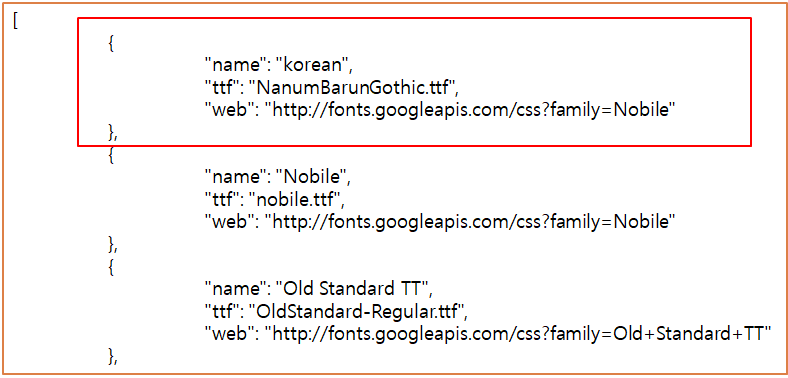

- 위와 같이 설정 후 jupyter notebook 새로 실행
- Kernel-> Restart
- create_tag_image() 함수의 fontname=‘korean’으로 변경

In [ ]:
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='malgun', rectangular=False)